In [2]:
import numpy as np
import astropy as ap
import matplotlib.pyplot as plt
import math as m
import pandas as pd

In [3]:
CATALOG=pd.read_csv('~/ASTRODATA/LCBG_LUMINOSITY_FUNCTION/COSMOS_CATALOGS/Photometry/COSMOS_CONVERTED_CATALOG.csv')

In [4]:
print(list(CATALOG))

['Unnamed: 0', 'CATAID', 'COSMOS_ID_06', 'COSMOS_ID_08', 'COSMOS_ID_13', 'I_MAG_AUTO', 'RA', 'DEC', 'RA_06', 'DEC_06', 'RA_COSMOS2015', 'DEC_COSMOS2015', 'LAMBDAR_COSMOS2006_sep', 'LAMBDAR_COSMOS2015_sep', 'EBV', 'SEMIMAJ_AS', 'SEMIMIN_AS', 'THETA_J2000', 'SG_ILBERT', 'SG_MAGSIZE', 'SG_COSMOS2015', 'SG_EYE', 'SG_MASTER', 'MASK_COSMOS2015', 'galex_fuv', 'galex_fuv_err', 'galex_nuv', 'galex_nuv_err', 'cfht_u', 'cfht_u_err', 'subaru_B', 'subaru_B_err', 'subaru_V', 'subaru_V_err', 'subaru_g', 'subaru_g_err', 'subaru_r', 'subaru_r_err', 'subaru_i', 'subaru_i_err', 'subaru_z', 'subaru_z_err', 'uvista_Y', 'uvista_Y_err', 'uvista_J', 'uvista_J_err', 'uvista_H', 'uvista_H_err', 'uvista_K', 'uvista_K_err', 'irac_1', 'irac_1_err', 'irac_2', 'irac_2_err', 'irac_3', 'irac_3_err', 'irac_4', 'irac_4_err', 'mips_24', 'mips_24_err', 'mips_70', 'mips_70_err', 'pacs_100', 'pacs_100_err', 'pacs_160', 'pacs_160_err', 'spire_250', 'spire_250_err', 'spire_350', 'spire_350_err', 'spire_500', 'spire_500_err', 

(0, 1)

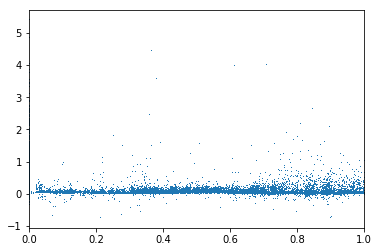

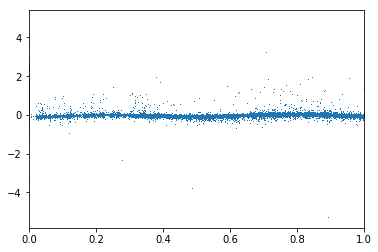

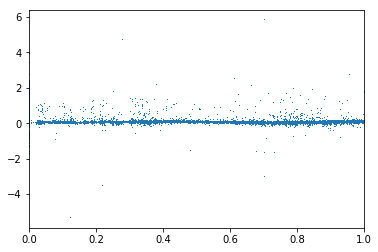

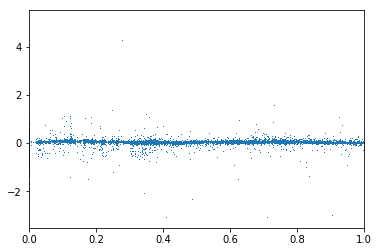

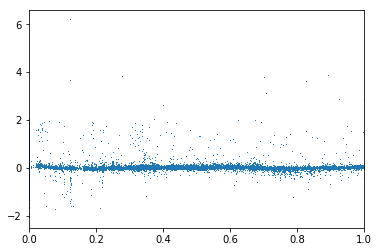

In [16]:
plt.figure()
plt.plot(CATALOG.loc[CATALOG.Z_USE<3]['Z_BEST'],CATALOG.loc[CATALOG.Z_USE<3]['mag_subaru_B']-CATALOG.loc[CATALOG.Z_USE<3]['subaru_B_synthetic_mag'],',')
plt.xlim(0,1)
#plt.ylim(-0.2,0.2)
plt.figure()
plt.plot(CATALOG.loc[CATALOG.Z_USE<3]['Z_BEST'],CATALOG.loc[CATALOG.Z_USE<3]['mag_subaru_V']-CATALOG.loc[CATALOG.Z_USE<3]['subaru_V_synthetic_mag'],',')
plt.xlim(0,1)
#plt.ylim(-0.2,0.2)
plt.figure()
plt.plot(CATALOG.loc[CATALOG.Z_USE<3]['Z_BEST'],CATALOG.loc[CATALOG.Z_USE<3]['mag_subaru_r']-CATALOG.loc[CATALOG.Z_USE<3]['subaru_r_synthetic_mag'],',')
plt.xlim(0,1)
#plt.ylim(-0.2,0.2)
plt.figure()
plt.plot(CATALOG.loc[CATALOG.Z_USE<3]['Z_BEST'],CATALOG.loc[CATALOG.Z_USE<3]['mag_subaru_i']-CATALOG.loc[CATALOG.Z_USE<3]['subaru_i_synthetic_mag'],',')
plt.xlim(0,1)
#plt.ylim(-0.2,0.2)
plt.figure()
plt.plot(CATALOG.loc[CATALOG.Z_USE<3]['Z_BEST'],CATALOG.loc[CATALOG.Z_USE<3]['mag_subaru_z']-CATALOG.loc[CATALOG.Z_USE<3]['subaru_z_synthetic_mag'],',')
plt.xlim(0,1)
#plt.ylim(-0.2,0.2)

In [30]:
GALS_0_25=CATALOG.loc[(CATALOG.Z_USE<3)&(CATALOG.Z_BEST<=0.25)&(CATALOG.Z_BEST>0.01)].sample(n=700)
GALS_25_50=CATALOG.loc[(CATALOG.Z_USE<3)&(CATALOG.Z_BEST<=0.5)&(CATALOG.Z_BEST>0.25)].sample(n=700)
GALS_50_75=CATALOG.loc[(CATALOG.Z_USE<3)&(CATALOG.Z_BEST<=0.75)&(CATALOG.Z_BEST>0.5)].sample(n=700)
GALS_75_100=CATALOG.loc[(CATALOG.Z_USE<3)&(CATALOG.Z_BEST<=1.0)&(CATALOG.Z_BEST>0.75)].sample(n=700)

In [29]:
GALS_0_25.loc[GALS_0_25.is_LCBG==1]

,Unnamed: 0,CATAID,COSMOS_ID_06,COSMOS_ID_08,COSMOS_ID_13,I_MAG_AUTO,RA,DEC,RA_06,DEC_06,...,subaru_r_kcorr_B,subaru_i_kcorr_B,subaru_z_kcorr_B,rest_frame_B-V,Abs_B_Mag,Abs_B_Mag_synthetic,Surface_Brightness_B,R_eff_arcsec_F814W,R_eff_arcsec_B,is_LCBG
179822,179822,6007561,1021548,633084.0,59414.0,19.425478,149.573970,1.858705,149.57395,1.858727,...,-0.505605,-0.813775,-0.903144,0.475606,-20.020367,-19.930083,20.898622,0.79737,0.833068,1
176696,176696,6012304,1131492,699660.0,123314.0,19.434940,150.572904,2.078228,150.57288,2.078249,...,-0.528024,-0.866814,-0.926014,0.486857,-18.627588,-18.499134,20.997444,0.69768,0.735413,1
169562,169562,6020464,1971050,1227147.0,226893.0,19.894835,150.213240,2.417847,150.21322,2.417867,...,-0.591993,-0.970832,-1.120635,0.564720,-18.959904,-18.842388,20.760816,0.52812,0.553586,1
166174,166174,6024447,2626877,1632802.0,295762.0,19.010921,150.521607,2.656000,150.52166,2.656014,...,-0.474761,-0.816689,-0.917155,0.443897,-20.442333,-20.344288,20.232967,0.70863,0.740244,1
175662,175662,6013498,1962614,1221889.0,234433.0,18.241291,150.119000,2.457187,150.11895,2.457178,...,-0.547225,-0.966781,-1.154720,0.558865,-21.365474,-21.237242,20.855538,1.32744,1.383390,1
172693,172693,6016907,1295355,804739.0,110857.0,20.840685,150.030859,2.036847,150.03084,2.036868,...,-0.498128,-0.862841,-0.936601,0.467891,-18.845513,-18.730969,20.886570,0.42501,0.443020,1
176032,176032,6013063,1669485,1038628.0,149101.0,20.878717,149.922409,2.164620,149.92239,2.164640,...,-0.360637,-0.526056,-0.592599,0.302351,-18.913446,-18.698991,20.821925,0.46245,0.483158,1
49264,49264,6327239,2303554,1432731.0,-9999.0,16.704218,150.265443,2.514769,150.26544,2.514790,...,-0.326169,-0.519819,-0.597892,0.301690,-20.191414,-20.271592,20.798391,2.11566,2.241484,1
177204,177204,6011713,791926,489432.0,56641.0,19.732235,150.578548,1.846300,150.57853,1.846321,...,-0.562087,-0.907916,-1.126241,0.561680,-19.600181,-19.463685,19.675807,0.37647,0.393387,1
177801,177801,6010302,950501,588387.0,51701.0,20.109608,149.964354,1.828505,149.96433,1.828526,...,-0.407937,-0.652450,-0.747009,0.362847,-19.470231,-19.383541,20.424467,0.49416,0.516192,1
